# Slightly better approach of Nearest Neighbors
### Where we compare not only with the most similar, but with the k most similar and compute the percent of each class in that set

## Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Collect data
### And select subsets for test and train

In [44]:
my_data = np.genfromtxt('../../ML/mnist_test.csv', delimiter=',')
train = my_data[0:999]
test = my_data[1000:1100]

## Functions from previous notebooks
*Reference Find Distance and Print Numberfor further explanation*

In [3]:
#This one is slightly twaked to accept the char instead of looking for it in the array
def getCharacter(char, side=28):
    size = side * side
    nm = char[0]
    pxs = np.zeros(size)
    for i in range(1, size + 1):
        pxs[i-1] = char[i]
    pxs = np.reshape(pxs, (side, side))
    pxs = np.fliplr([pxs])[0]
    
    return nm, pxs

def plotCharacter(pxs):
    side = pxs.shape[0]
    y = x = range(1, side + 1)
    x, y = np.meshgrid(x, y)
    plt.pcolormesh(x, y, pxs, cmap=plt.cm.get_cmap('Greys'))
    plt.colorbar()
    plt.show()
    
def findDistance(pxs1, pxs2, square=False):
    if square:
        return np.sum(np.square(pxs1 - pxs2))
    else:
        return np.sum(np.absolute(pxs1 - pxs2))

def nearestNeighbourRemove( train, pxs ):
    #Give a default value to minDif to then compare and minimize
    _, iniChar = getCharacter(train[0])
    nearest = train[0]
    minDif = findDistance(iniChar, pxs)
    
    closestIndex = 0
    
    for i in range(train.shape[0]):
        #we use this index to delete the element once we are done
        char = train[i]
        _, pxs2 = getCharacter(char)
        dif = findDistance(pxs2, pxs)        
        if dif < minDif:
            minDif = dif
            nearest = char
            closestIndex = i
    
    return nearest, closestIndex

In [4]:
train.shape

(99, 785)

In [5]:
train = np.delete(train,2,0)
train.shape

(98, 785)

## Function for finding the Kth characters with the least distance

In [6]:
#will return an k dimensional array, with the values of the char closest to pxs
def kNearest( train, pxs, k ):
    neighbors = []
    for i in range(k):
        #get the entire thing so we can remove it from the training
        nearest, closestIndex = nearestNeighbourRemove(train, pxs)
        #get the value so we can store in neghbors array
        value, _ = getCharacter(nearest)
        neighbors.append(value)
        # remove the element from the training set so we wont find it again!
        # good news is that python wont update the original array, and therefore
        # there is no need to import the data every time we run this algorithm
        train = np.delete(train,closestIndex,0)
    
    return neighbors

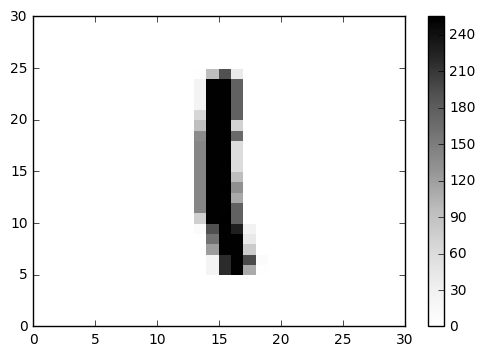

In [47]:
nm, pxs = getCharacter(test[8])
plotCharacter(pxs)

In [ ]:
kn = kNearest(train, pxs,50)
print(kn)

## Calculate %

In [32]:
def calculatePercent(kNearest, lables):
    each = [0]*len(lables)
    
    for i in kNearest:
        each[int(i)] += 1
        
    for i in range(len(each)):
        each[i] /= len(kNearest)
        print("{0} -> {1}%".format(i, int(each[i]*100)))

In [33]:
calculatePercent(kn, range(10))

0 -> 0%
1 -> 26%
2 -> 8%
3 -> 12%
4 -> 10%
5 -> 10%
6 -> 8%
7 -> 14%
8 -> 0%
9 -> 12%


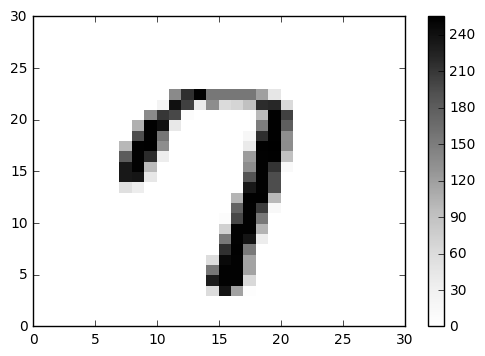

In [41]:
nm, pxs = getCharacter(test[55])
plotCharacter(pxs)

In [45]:
kn = kNearest(train, pxs,100)
calculatePercent(kn, range(10))

0 -> 1%
1 -> 1%
2 -> 1%
3 -> 2%
4 -> 22%
5 -> 0%
6 -> 0%
7 -> 39%
8 -> 0%
9 -> 34%
